# Hacksembly

## Project - Extracting nutrition data from nutrition label images


Tesseract, an open source library for optical character recognition 

#### Self notes for installation

There is a docker image for tesseract
```docker pull ocrd/tesserocr```

However I'm going to install pytesseract on top of tensorflow-notebook as base.
```docker run -p 8888:8888 -v "${PWD}":/home/jovyan/work -e GRANT_SUDO=yes jupyter/tensorflow-notebook:tensorflow-2.4.1
docker exec -it [container] /bin/sh
sudo apt update
sudo apt install tesseract-ocr
sudo apt install libtesseract-dev
sudo pip install pytesseract
```

### lib documentation 
* https://pypi.org/project/pytesseract/
* pytesseract is a wrapper for tesseract OCR engine 
* https://github.com/tesseract-ocr/tesseract
* https://github.com/tesseract-ocr/tessdoc

***


In [33]:
#imports

from PIL import Image
import pytesseract 
import requests # for reading images from urls


***


In [75]:
def print_image_dims(img):
    print("image dimensions {}*{}".format(img.width,img.height))

image dimensions 344*626


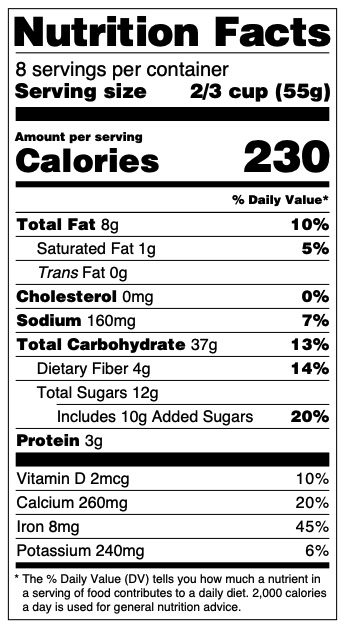

In [76]:

stdvertimg = Image.open("work/stdvert.jpg")

print_image_dims(stdvertimg)
display(stdvertimg) #use Ipython's display instead of image.show()


In [12]:
text = pytesseract.image_to_string(stdvertimg) # extract text from image
print(text)

 

 

Nutrition Facts

8 servings per container
Serving size 2/3 cup (55g)
—

Calories _230

% Daily Value*

 

 

 

Total Fat 89 10%
Saturated Fat 1g 5%
Trans Fat 0g

Chol 1 omg 0%

Sodium 160mg 7%

Total Carbohydra' 13%
Dietary Fiber 4g 14%

Total Sugars 129
Includes 10g Added Sugars 20%
Protein 3g

Vitamin D 2meg 10%
Calcium 260mg 20%
Iron 8mg 45%
Potassium 240mg 6%

"The % Daily Value (DV) tells you how much a nutrient in
a serving of food contributes to a daily diet. 2,000 calories
a day is used for general nutrition advice.

 

 



###  notes:
* there is an **-** under *Servings* line
* \d\***g** tends to be extracted as \d\***9**  example Total Fat 8**9** vs 8**g**. This is occuring frequently.
* **e** in Chol**e**st**e**rol, Carbohydrat**e** with the font and bold text is causing trouble as well.
* micro gram **mcg** is being read as **meg**, **0**mg is read as **O**mg, frequently as well.


***
### Extracting positional data and confidence score

In [22]:
text = pytesseract.image_to_data(stdvertimg)
print(type(text))
print(text)

<class 'str'>
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	344	626	-1	
2	1	1	0	0	0	8	7	329	3	-1	
3	1	1	1	0	0	8	7	329	3	-1	
4	1	1	1	1	0	8	7	329	3	-1	
5	1	1	1	1	1	8	7	329	3	95	 
2	1	2	0	0	0	7	8	3	612	-1	
3	1	2	1	0	0	7	8	3	612	-1	
4	1	2	1	1	0	7	8	3	612	-1	
5	1	2	1	1	1	7	8	3	612	95	 
2	1	3	0	0	0	14	16	316	31	-1	
3	1	3	1	0	0	14	16	316	31	-1	
4	1	3	1	1	0	14	16	316	31	-1	
5	1	3	1	1	1	14	16	184	31	96	Nutrition
5	1	3	1	1	2	216	17	114	30	95	Facts
2	1	4	0	0	0	15	61	315	60	-1	
3	1	4	1	0	0	15	61	315	60	-1	
4	1	4	1	1	0	16	61	213	19	-1	
5	1	4	1	1	1	16	62	10	14	96	8
5	1	4	1	1	2	33	61	73	19	96	servings
5	1	4	1	1	3	113	65	28	15	96	per
5	1	4	1	1	4	147	61	82	16	96	container
4	1	4	1	2	0	15	83	315	19	-1	
5	1	4	1	2	1	15	83	81	19	96	Serving
5	1	4	1	2	2	104	83	42	15	96	size
5	1	4	1	2	3	190	83	31	17	94	2/3
5	1	4	1	2	4	229	87	39	15	95	cup
5	1	4	1	2	5	276	83	54	19	92	(55g)
4	1	4	1	3	0	16	107	313	14	-1	
5	1	4	1	3	1	0	103	71	27	47	—
2	1	5	0	0	0	15	132	314	41	-1	

### notes:
* In post processing the text output and returning a structred format nutrition data
    * we can use the positional data
    * Also, notice some of the usual suspects has lower confidence score. 
        * 47	—
        * 53	_230
        * 31	omg
        * 17	Carbohydra'
    * Confidence score can be used to correct them 

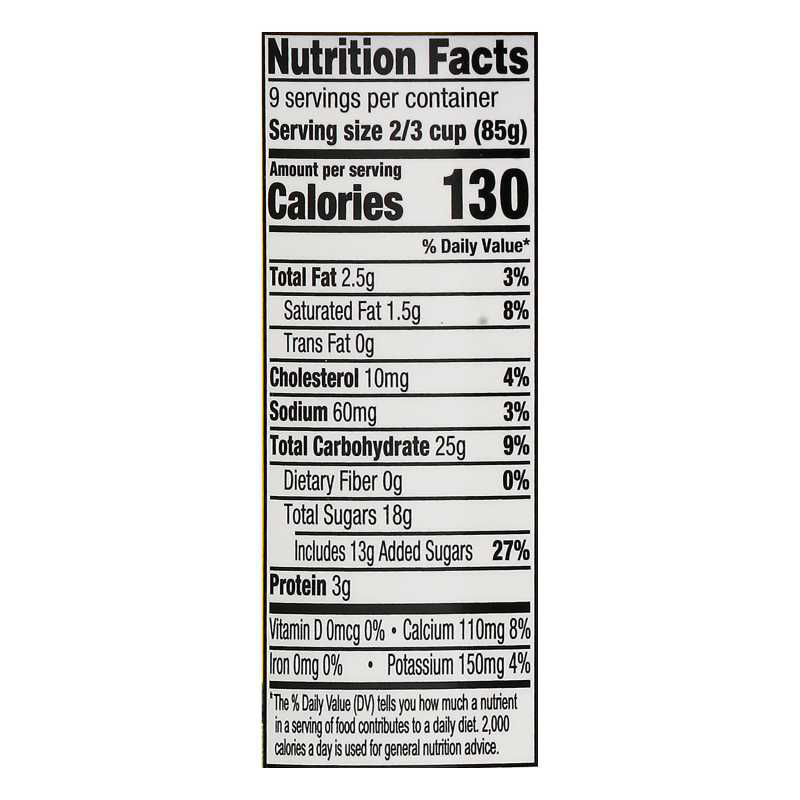

Saturated Fat 1.59

Trans Fat 0g
Cholesterol 10mg
Sodium 60mg
Total Carbohydrate 259

Dietary Fiber 0g

Total Sugars 18g

Includes 139 Added Sugars 27%

Protein 3g
Vitamin D Omg 0% + Calcium 110mg 8%
lronOmg 0% —» Potassium 150mg 4%

"The Daly Value (DV) tls you how much a nutrient
ina senig of food contbues toa daly ie. 2000
canis a days used for general nutrton advice,

 



In [44]:


# https://www.foodcity.com/product/501/0007524320214 
url = "https://kvat-webassets.aisleahead.com/getMainImageSquare.php?upc=0007524320214&size=800&order=6"
img = Image.open(requests.get(url, stream=True).raw)
display(img)
print(pytesseract.image_to_string(img))

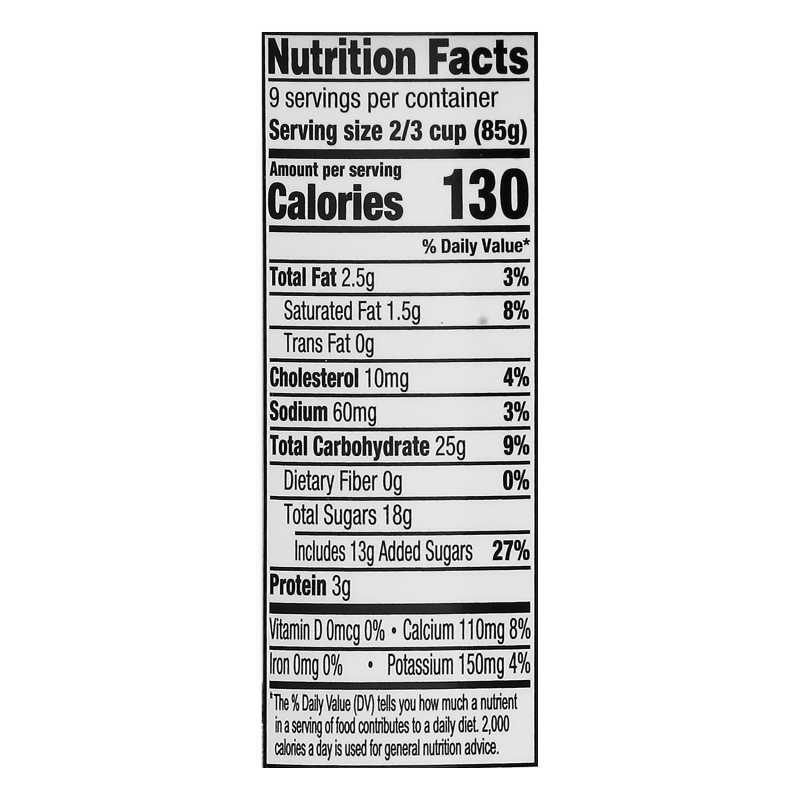

Nutrition Facts
9 servings per container
Serving size 2/3 cup (859)
Amount per serving
Calories 130
% Daily Value*
Total Fat 2.59 3%
Saturated Fat 1.59 8%
Trans Fat 0g
Cholesterol 10mg 4%
Sodium 60mg 3%
Total Carbohydrate 25g 9%
Dietary Fiber Og 0%
Total Sugars 18g
Includes 139 Added Sugars 27%
Protein 3g
Vitamin D Omeg 0% » Calcium 110mg 8%
lon Omg 0% ©» Potassium 150mg 4%

"The Daly Value (DV) tls you how much a nutent
ina senig of food contbues toa daly ie. 2000
canis a days used for general nutrion advice,

 



In [45]:
img = img.convert('L') #greyscale - seems to give better results 
display(img)
print(pytesseract.image_to_string(img))


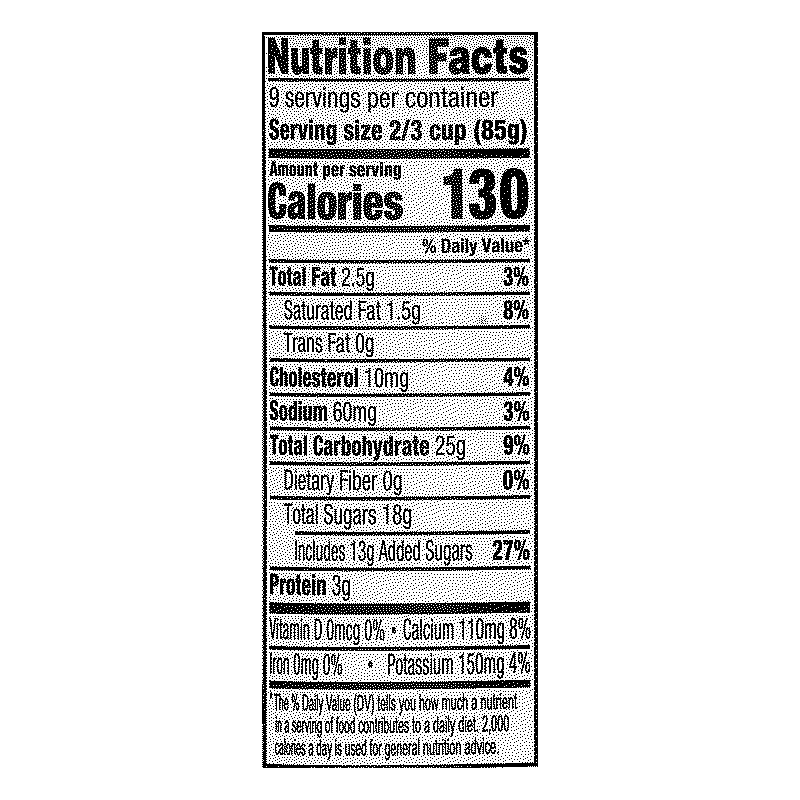

Nutrition Facts
9 servings per container
Serving size 2/3 cup (859)

Re RST EN |
‘Amount per serving
Calories 130
ae bally value
Total Fat? 50 ah
Salurated Fat 15g
Trans Fat Og

Cholesteral 10mg

Sodium 60m
Total Carbohydrate 259
Dietary Fiber Og
‘Total Suoars (80
tneodes 18a Adced Sugars 27%
Protein 3o

Vitamin D Ortog 0% + Calcium 110mg 8%
Fevdng 0% + Potassium 150mg 4%

"The Day Valu (OV ols you how much a hint
Peipianee bry eM
esa tay ied fv gral nut ave.

 



In [46]:
img = img.convert('1') #binarization,  bad result compared to 
display(img)
print(pytesseract.image_to_string(img))

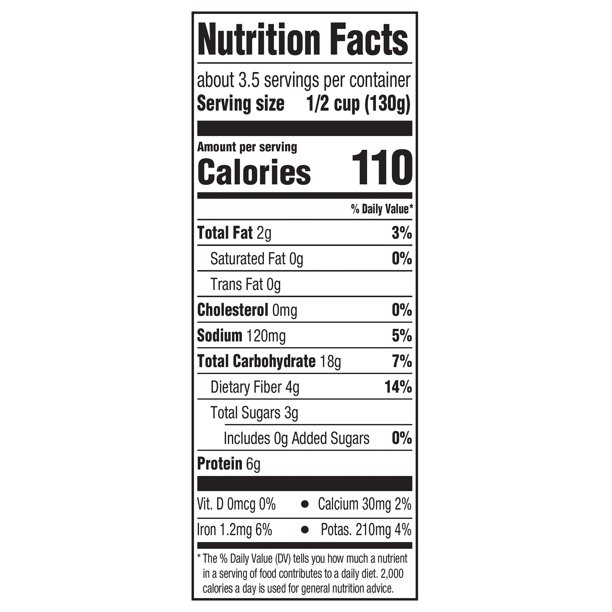

Nutrition Facts

about 3.5 servings per container

/Amount per serving
Calories 110
Dally Value
Total Fat 29 3%
Saturated Fat 0g 0%:
Trans Fat Og
Cholesterol Omg 0%
‘Sodium 120mg 5%
Total Carbohydrate 189 T%
Dietary Fiber 4g 14%

Total Sugars 39
Includes 0g Added Sugars 0%

[|
Vit. D Omcg 0% — © Calcium 30mg 2%
iron 1.2m 6% Potas, 210mg 4%
oe

“The % Daily Vaue (DV) tes you how mucha nutient
ina serving of food cotroutes toa daly cet.2,000
caries a days used for general nuttin advice

 

 



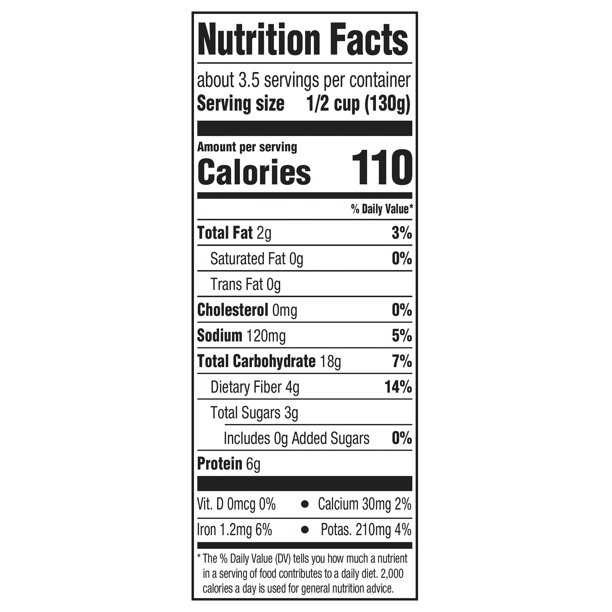

Nutrition Facts

about 3.5 servings per container

/Amount per serving
Calories 110
ally Value
Total Fat 2g 3%
Saturated Fat Og 0%:
Trans Fat Og
Cholesterol Omg 0%
‘Sodium 120mg 5%
Total Carbohydrate 189 T%
Dietary Fiber 4g 14%

Total Sugars 39
Includes 0g Added Sugars 0%:

Le
Vit. D Omcg 0% — © Calcium 30mg 2%
iron 1.2mg 6% Potas. 210mg 4%
SS

*The % Daily Vaue (DV) tes you how mucha nutient
ina serving of food cotroutes toa daly cet.2,000
calories a days used for general nuttin advice,

 

 



In [47]:
url = "https://i5.walmartimages.com/asr/97bcdb4b-a0fd-498e-95fe-3773548c16ab.b9bd1f6e34aacdd9efa41cf2cb1307f4.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF"
img = Image.open(requests.get(url, stream=True).raw)
display(img)
print(pytesseract.image_to_string(img))
img = img.convert('L')
display(img)
print(pytesseract.image_to_string(img))

#### notes :
* notice special characters **© » |‘ “** sprinked around in the output. 


***

### Allow list, block list of characters to influence image_to_string

https://stackoverflow.com/questions/43705481/pytesseract-set-character-whitelist

In [74]:
allowlistconfigstr = "-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz*%,/()\ ><"
print(pytesseract.image_to_string(img, config=allowlistconfigstr))

 

 

Nutrition Facts

About 8 servings per container

Serving size 10z (28g/About
50 Chickpeas)

 

Amount Per Serving

Calories 110

 

 

% Daily Valu
Total Fat 39 4%
Saturated Fat 0g 0%
Trans Fat 0g
Cholesterol Omg 0%
Sodium 290mg 13%
Total Carbohydrate 169 6%
Dietary Fiber 69 21%
Total Sugars 2g
Includes 19 Added Sugars 2%
rotein 6g 9%
Vitamin D Omeg 0%
Calcium 30mg 2%
iron img 6%
Potassium 230mg 4%

 

% Dally Value (OV) tells you how much a nutrient in a
serving of food contibutes to a dally it 2,000 calvies a day is
sed for general ruttion advice,

 

 



***
### A few examples

Foodcity 
<https://www.foodcity.com/product/501/0003680030796>

image dimensions 800*800


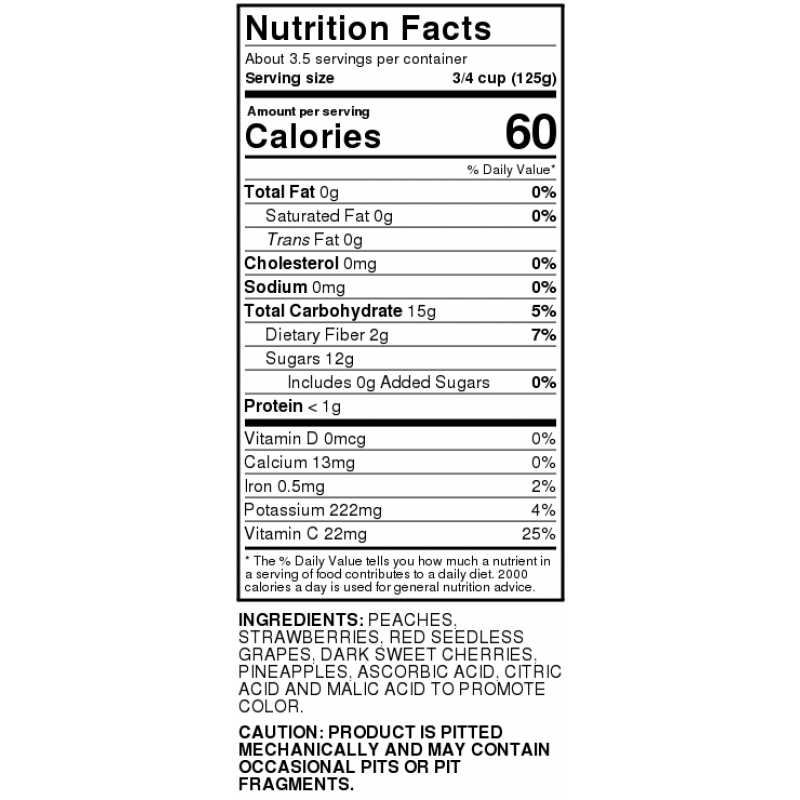

Nutrition Facts

About 35 servings per container
Serving size 3/4 cup (125g)
Sl

Amount per serving
Calories 60
% Daily Value*
Total Fat 0g
Saturated Fat 0g
Trans Fat 0g
Cholesterol Omg
Sodium Omg
Total Carbohydrate 15g 5%
Dietary Fiber 2g 7%
Sugars 12g
Includes Og Added Sugars 0%
Protein < 1g

Vitamin D Omeg 0%
Calcium 13mg 0%
iron 05mg 2%
Potassium 222mg 4%
Vitamin C 22mg 25%
* The % Daily Value tells you how much a nutrient in

a serving of food contributes to a daily diet 2000
calories a day is used for general nutrition advice

 

INGREDIENTS PEACHES,

STRAWBERRIES, RED SEEDLESS

GRAPES, DARK SWEET CHERRIES,

PINEAPPLES, ASCORBIC ACID, CITRIC

Soren MALIC ACID TO PROMOTE
LOR,

CAUTION PRODUCT IS PITTED
MECHANICALLY AND MAY CONTAIN
OCCASIONAL PITS OR PIT
FRAGMENTS,

CPU times: user 31.5 ms, sys: 20.3 ms, total: 51.9 ms
Wall time: 18.5 s


In [82]:
#https://www.foodcity.com/product/501/0003680030796
url = "https://kvat-webassets.aisleahead.com/getMainImageSquare.php?upc=0003680030796&size=800&order=4"
img = Image.open(requests.get(url, stream=True).raw)
print_image_dims(img)
img = img.convert('L')
display(img)
%time print(pytesseract.image_to_string(img, config=allowlistconfigstr))

image dimensions 800*800
image dimensions 800*800


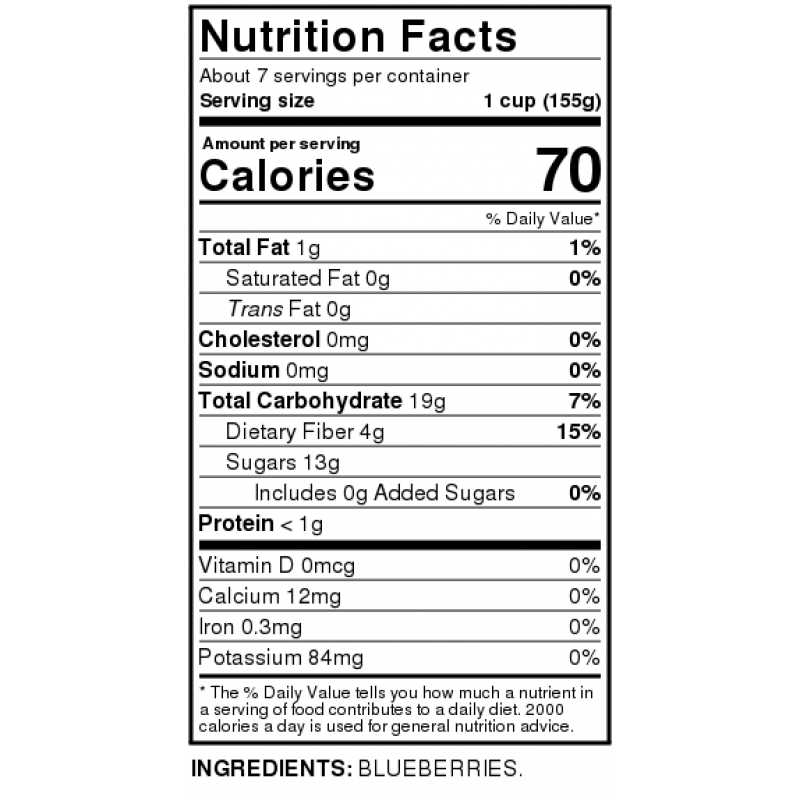

Nutrition Facts

About 7 servings per container
Serving size 1 cup (155g)
ST

Amount per serving
Calories 70
% Daily Value*

Total Fat 1g

Saturated Fat 0g

Trans Fat Og
Cholesterol Omg
Sodium Omg

Total Carbohydrate 19g 7%
Dietary Fiber 4g 15%

Sugars 13g
Includes 0g Added Sugars 0%
Protein < 1g

Vitamin D Omeg 0%
Calcium 12mg 0%
lron 0,3mg 0%
Potassium 84mg 0%
* The % Daily Value tells you how much a nutrient in

a serving of food contributes to a daily diet, 2000
calories a day is used for general nutrition advice,

INGREDIENTS BLUEBERRIES,

 

CPU times: user 33.5 ms, sys: 16.2 ms, total: 49.7 ms
Wall time: 13.2 s


In [84]:
#https://www.foodcity.com/product/501/0003680011942
url = "https://kvat-webassets.aisleahead.com/getMainImageSquare.php?upc=0003680011942&size=800&order=4"
img = Image.open(requests.get(url, stream=True).raw)
print_image_dims(img)
img = img.convert('L')
print_image_dims(img)
display(img)
%time print(pytesseract.image_to_string(img, config=allowlistconfigstr))

***
#### Walmart example
note - this item does not have complete nutritional data on the page

<https://www.walmart.com/ip/Biena-8-oz-Rockin-Ranch-Roasted-Chickpea-Snacks/752518102>


downloaded image
image dimensions 612*612


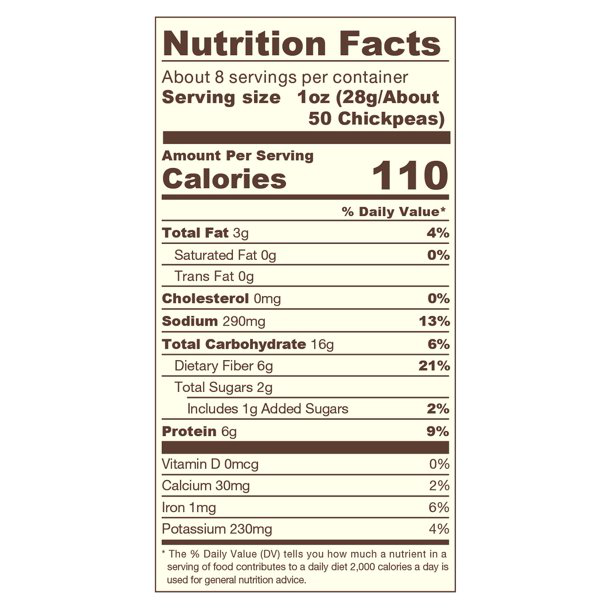

displaying greyscale image


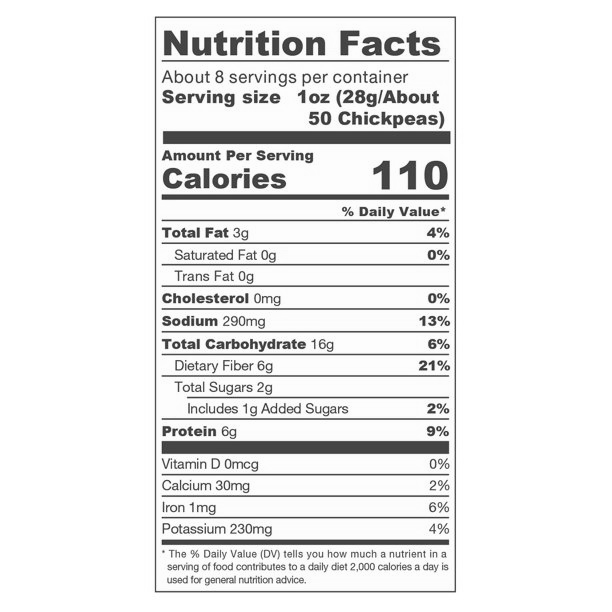

 

 

Nutrition Facts

About 8 servings per container

Serving size 10z (28g/About
50 Chickpeas)

 

Amount Per Sei

Calories

 

Total Fat 3
Saturated Fat Og
Trans Fat 0g

Cholesterol Omg 0%

 

 

 

‘Sodium 290mg 13%
Total Carbohydrate 169 6%
Dietary Fiber 6g 21%
Total Sugars 2g
Includes 19 Added Sugars 2%
tein 6g 9%
|
Vitamin D Omeg 0%
Calcium 30mg 2%
iron img 6%
Potassium 230mg 4%
The % Dally Value (OV) tells you how much a nutrient in a

 

serving offood contributes to a dally cit 2,000 calvies a day is
sed for general rtition ace,

 

 

CPU times: user 30.9 ms, sys: 15.6 ms, total: 46.6 ms
Wall time: 10.1 s


In [89]:

url = "https://i5.walmartimages.com/asr/4e9e32d4-d1d7-4f33-b01b-c1bd1b688def.5c7b14cf68e48253e7334d20ddc7aef3.jpeg?odnHeight=612&odnWidth=612&odnBg=FFFFFF"
img = Image.open(requests.get(url, stream=True).raw)
print("downloaded image")
print_image_dims(img)
display(img)
img = img.convert('L')
print("displaying greyscale image")
display(img)
%time print(pytesseract.image_to_string(img, config=allowlistconfigstr))

***
### Image enhancements
* Trying sharpness

 greyscale image, before enhancing


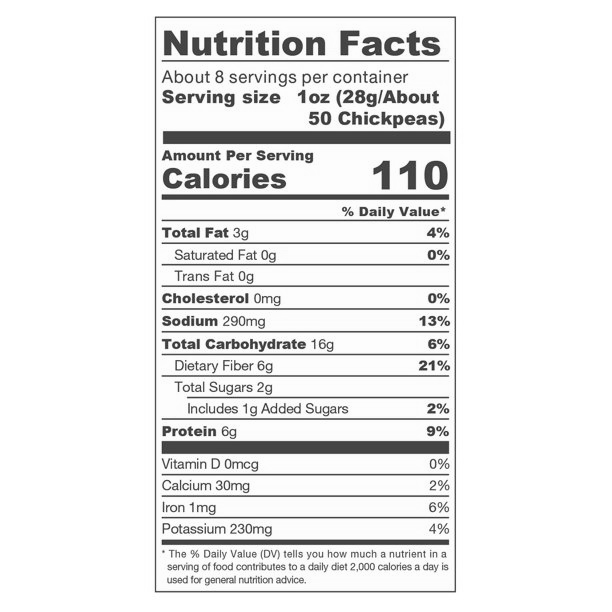

CPU times: user 3.21 ms, sys: 146 µs, total: 3.36 ms
Wall time: 2.9 ms
factor = 2


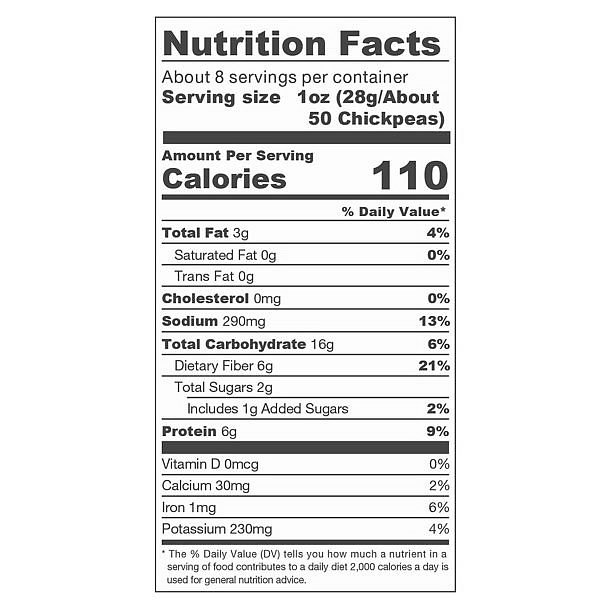

 

 

Nutrition Facts

About 8 servings per container
Serving size 1o0z (28g/About

50 Chickpeas)
ee

Amount Per Serving

Calories 110

  

 

 

% Daily Valu

Total Fat 39 4%
Saturated Fat 0g 0%
Trans Fat 0g

Cholesterol Omg 0%

  

Sodium 290mg 13%
Total Carbohydrate 16g 6%
Dietary Fiber 6g
Total Sugars 2g

 

 

includes 1g Added Sugars 2%
Protein 9%
a
Vitamin D Omeg 0%
Calcium 30mg 2%
iron img 6%
Potassium 280mg 4%

 

The % Daily Value (DV) tells you how much a nutrient in a
serving of food contbutes toa dally cit 2,000 calvies a day is
sed for general nuttin ace,

 

 



In [90]:
from PIL import ImageEnhance

print(" greyscale image, before enhancing")
display(img)

enhancer = ImageEnhance.Sharpness(img)

factor = 2
%time enImg = enhancer.enhance(factor)
print("factor = {}".format(factor))
display(enImg)
print(pytesseract.image_to_string(enImg, config=allowlistconfigstr))


#### notes:
* Sharpness improved the result.
* time to enhance convert appears to be fast.
* In a previous example, Total Fa**t** is extracted, Chol**e**st**erol** and Carbohydrat**e** as well.
* In this example, Amount per serving is extracted correctly.
* However, there are additional chars appearing, eg: 'a' under Protein, 'ee' under 50 Chickpea

***
### Language  and image rotation identification

* How do we know which characterset to use in config?
* for lang == Eng, allowlistconfigstr = "-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz*%,/()\ ><"
* Looks like we can detect script but not language. 
* Can run the extracted text against ```from nltk.corpus import words```
* FDA mandates nutrition label is in English and optionally additional language

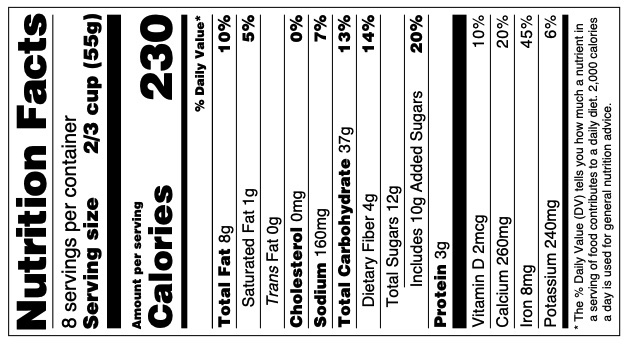

<class 'str'>
Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 3.43
Script: Latin
Script confidence: 3.00



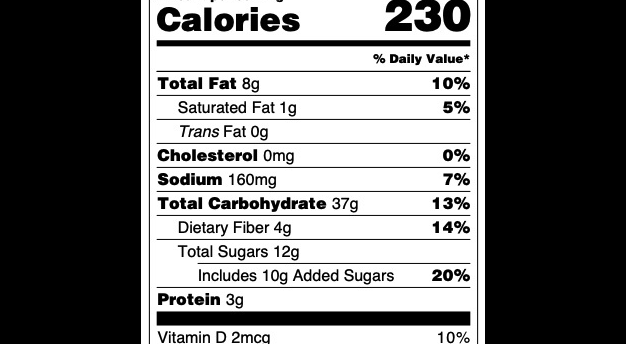

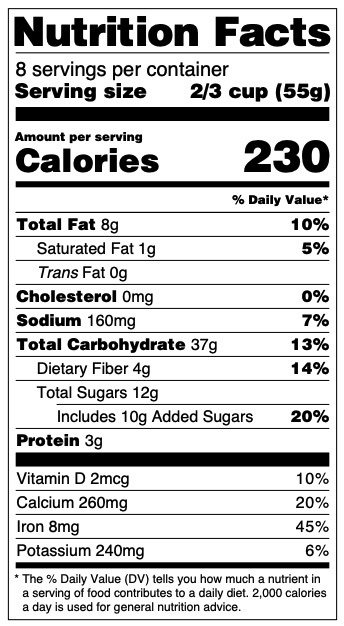

In [101]:
stdvertleftrotatedimg = Image.open("work/stdvertrotated.jpg")
display(stdvertleftrotatedimg)
out = pytesseract.image_to_osd(stdvertleftrotatedimg)
print(type(out))
print(out)
display(stdvertleftrotatedimg.rotate(-90))
display(stdvertleftrotatedimg.rotate(-90, expand=True))

***
### Putting it together


In [117]:

#img = Image.open(requests.get(url, stream=True).raw)

def process_nutrition_label(img):
    
    print_image_dims(img)
    display(img)
    img = img.convert('L')
    allowlistconfigstr = "-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz*%,/()\ ><"
    enhancer = ImageEnhance.Sharpness(img)
    factor = 2
    enImg = enhancer.enhance(factor)
    print("Processed image")
    display(enImg)
    print(pytesseract.image_to_string(enImg, config=allowlistconfigstr))
    print(pytesseract.image_to_data(enImg, config=allowlistconfigstr))

***
## Next:  todo

1. Explore **openCV** <https://pypi.org/project/opencv-python/> for contour detection OR **Kraken** <http://kraken.re/master/index.html> for segment detection and trim the label part (nutrition table) of the bigger image
2. identify and correct rotation using PyTesseract ```pytesseract.image_to_osd``` and `PIL`
3. run through process_nutrition_label


### Preprocessing -  
* Binary Classification :TODO
    * Ideally, we would need a binary classifer first to classify if an image is of nutrition label.
    * Only those that filtered through the classifer would proceed for image to text processing
* up/down scale image size for better performance :TODO
* greyscale conversion and enhancement can done as a part of preprocessing



***
## Other label formats
<https://www.fda.gov/media/99203/download>


### Standard Vertical

image dimensions 344*626


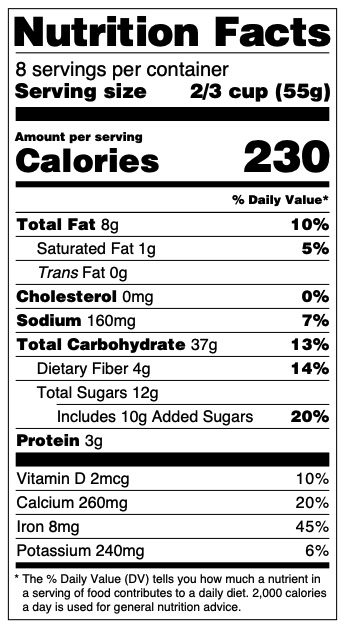

Processed image


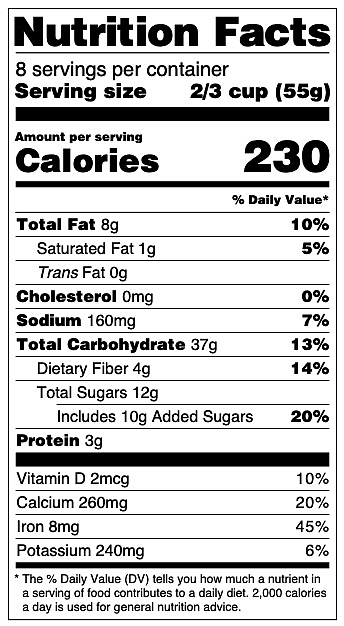

 

 

Nutrition Facts

8 servings per container
Serving size 2/3 cup (55g)
ee

Calories 230

% Daily Value*

 

 

Total Fat 89 10%
Saturated Fat 1g 5%
Trans Fat 0g

Cholesterol Omg 0%

Sodium 160mg 7%

Total Carbohydrate 379 13%
Dietary Fiber 49 14%

Total Sugars 129
Includes 10g Added Sugars 20%
Protein 3g

Vitamin D 2meg 10%
Calcium 260mg 20%
Iron 8mg 45%
Potassium 240mg 6%

The % Daily Value (DV) tells you how much a nutrient in
a serving of food contributes to a daily diet, 2,000 calories
a day is used for general nutrition advice,

 

 

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	344	626	-1	
2	1	1	0	0	0	8	7	329	3	-1	
3	1	1	1	0	0	8	7	329	3	-1	
4	1	1	1	1	0	8	7	329	3	-1	
5	1	1	1	1	1	8	7	329	3	95	 
2	1	2	0	0	0	7	8	3	612	-1	
3	1	2	1	0	0	7	8	3	612	-1	
4	1	2	1	1	0	7	8	3	612	-1	
5	1	2	1	1	1	7	8	3	612	95	 
2	1	3	0	0	0	14	16	316	31	-1	
3	1	3	1	0	0	14	16	316	31	-1	
4	1	3	1	1	0	14	16	316	31	-1	
5	1	3	1	1	1	14	16	184	31	96	Nutrition
5	1

In [107]:
process_nutrition_label(Image.open("work/stdvert.jpg"))

***
### Vertical micro nutrients side by side


image dimensions 347*581


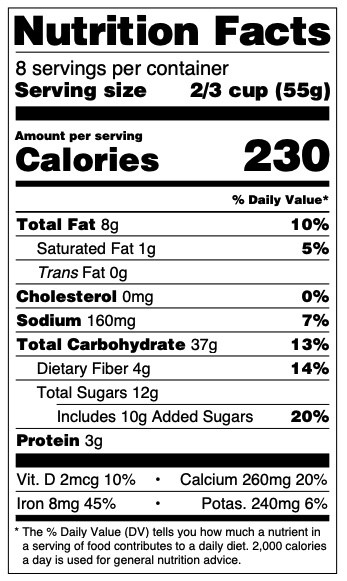

Processed image


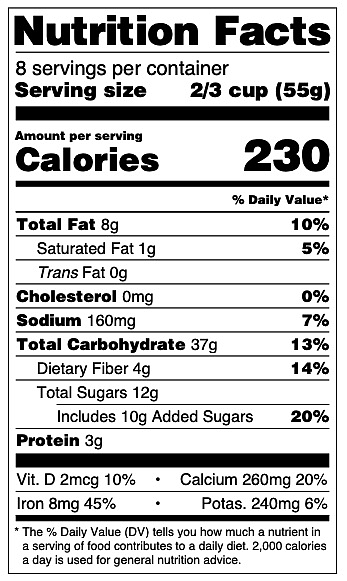

 

 

Nutrition Facts

8 servings per container
Serving size 2/3 cup (55g)

 

Calories 230

% Daily Value*

 

 

 

Total Fat 89 10%
Saturated Fat 1g 5%
Trans Fat 0g

Cholesterol Omg 0%

Sodium 160mg 7%

Total Carbohydra 13%
Dietary Fiber 49 14%

Total Sugars 129
Includes 10g Added Sugars 20%
Protein 3g

 

Vit, D 2meg 10%
Iron 8mg 45%

Calcium 260mg 20%
Potas 240mg 6%
* The % Daily Value (DV) tells you how much a nutrient in

a serving of food contributes to a daily diet, 2,000 calories
a day is used for general nutrition advice,

 

 

 

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	347	581	-1	
2	1	1	0	0	0	8	7	329	2	-1	
3	1	1	1	0	0	8	7	329	2	-1	
4	1	1	1	1	0	8	7	329	2	-1	
5	1	1	1	1	1	8	7	329	2	95	 
2	1	2	0	0	0	8	7	1	567	-1	
3	1	2	1	0	0	8	7	1	567	-1	
4	1	2	1	1	0	8	7	1	567	-1	
5	1	2	1	1	1	8	7	1	567	95	 
2	1	3	0	0	0	14	15	316	31	-1	
3	1	3	1	0	0	14	15	316	31	-1	
4	1	3	1	1	0	14	15	316	31	-1	
5	1	3	1	1	1	14	15	184	31	95	Nutrition
5	1	

In [108]:
process_nutrition_label(Image.open("work/vertmicronutrsidebyside.jpg"))

***
### Vertical Display Including Some Voluntary Nutrients  

image dimensions 279*887


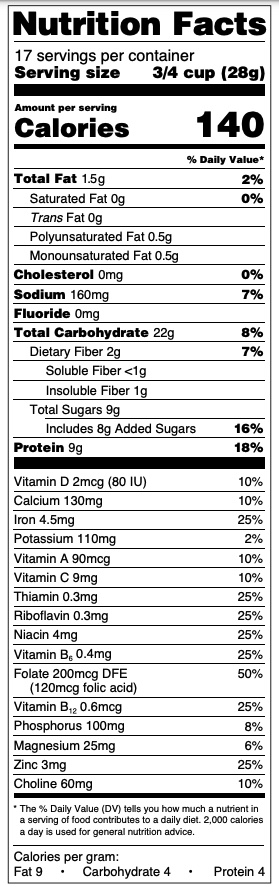

Processed image


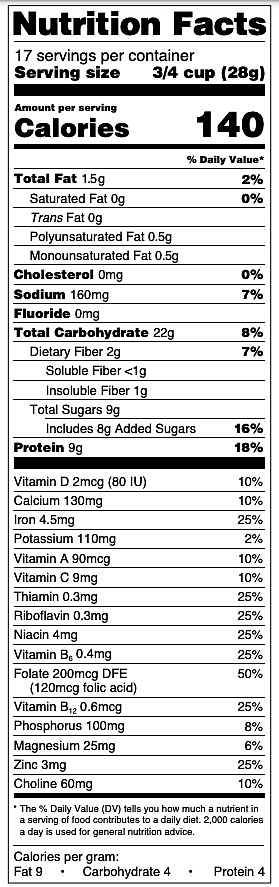

 

 

Nutrition Facts

17 servings per container
Serving size 3/4 cup (28g)
Se

 

Galories 140

Se Daily Value

 

Total Fat 159 2%
Saturated Fat 0g 0%
Trans Fat 0g

Polyunsaturated Fat 0,59
Monounsaturated Fat 0,59

 

 

Cholesterol Omg 0%
Sodium 160mg 7%
ide Omg
Total Carbohydrate 22g 8%
Dietary Fiber 2g 7%

Soluble Fiber <1g
Insoluble Fiber 1g

Total Sugars 9g
Includes 8g Added Sugars 16%

 

 

Protein 9g 18%
es
Vitamin D 2meg (80 IU) 10%
Calcium 130mg 10%
iron 4,5mg 25%
Potassium 110mg 2%
Vitamin A 80meg 10%
Vitamin C 8mg 10%
Thiamin 033mg 25%
Ribofiavin 03mg 25%
Niacin 4mg 25%
Vitamin B, 04mg 25%
Folate 200meg DFE 50%
(120meg folic acid)
Vitamin B,, 0,6meg 25%
Phosphorus 100mg 8%
Magnesium 25mg 6%
Zine mg 25%
Choline 60mg 10%

* Tha % Dally Value (OV) tals you how much a nutent in
serving of food contributes o a daly ct 2,000 caloriae
8 day i used for ganeral ution advice,

Calories per gram
Fat9 Carbohydrate 4 Protein 4

 

 

level	page_num	block_num	par_num	line_num	word_nu

In [109]:
process_nutrition_label(Image.open("work/vertvoluntarynutrients.jpg"))

***
### Tabular Display for Small or Intermediate-Sized Packages 


image dimensions 556*200


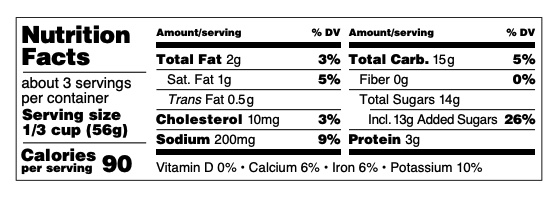

Processed image


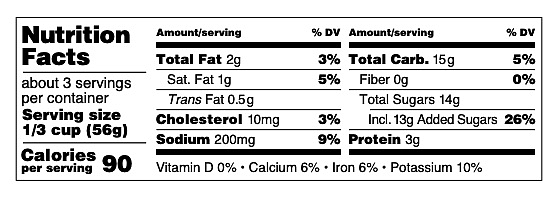

 

 

 

 

Nutrition 22ereries %6 DV Amountisorving pv
Facts Total Fat 2g 3% Total Carb, 159 5%
about S servings Sat Fat ig 5% Fiber Og 0%
per container Trans Fat 059 Total Sugars 14g

Serving size Cholesterol 10mg 3% Incl13g Added Sugars 26%

1/3 cup (56g)

 

per serving

90

  

Sodium 200mg 9% Prot

39
Vitamin D 0% Calcium 6% Iron 6% Potassium 10%

 

 

 

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	556	200	-1	
2	1	1	0	0	0	15	17	3	164	-1	
3	1	1	1	0	0	15	17	3	164	-1	
4	1	1	1	1	0	15	17	3	164	-1	
5	1	1	1	1	1	15	17	3	164	95	 
2	1	2	0	0	0	16	13	526	9	-1	
3	1	2	1	0	0	16	13	526	9	-1	
4	1	2	1	1	0	16	13	526	9	-1	
5	1	2	1	1	1	16	13	526	9	95	 
2	1	3	0	0	0	349	42	186	6	-1	
3	1	3	1	0	0	349	42	186	6	-1	
4	1	3	1	1	0	349	42	186	6	-1	
5	1	3	1	1	1	349	42	186	6	95	 
2	1	4	0	0	0	23	65	512	9	-1	
3	1	4	1	0	0	23	65	512	9	-1	
4	1	4	1	1	0	23	65	512	9	-1	
5	1	4	1	1	1	23	65	512	9	95	 
2	1	5	0	0	0	8	25	527	102	-1	
3	1	5	1	0	0	22	25	513	82	-1	
4	1	5	1	1

In [115]:
process_nutrition_label(Image.open("work/tabularsmallpack.jpg"))

***
### Aggregate Display 

image dimensions 693*604


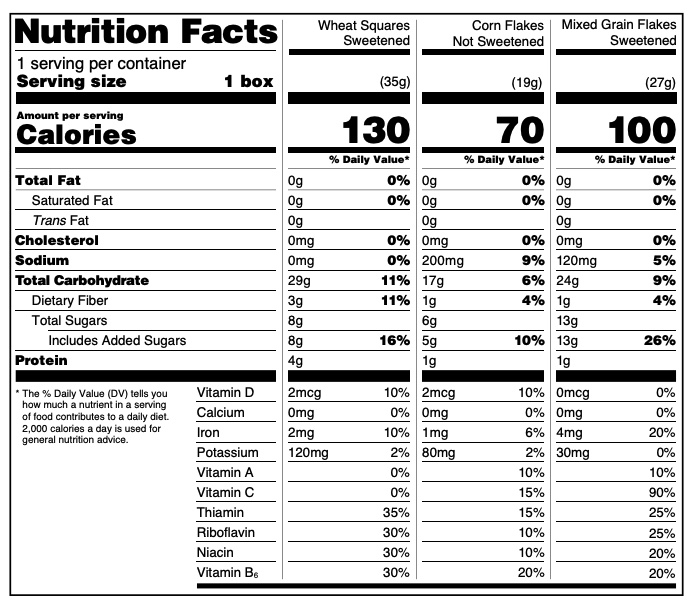

Processed image


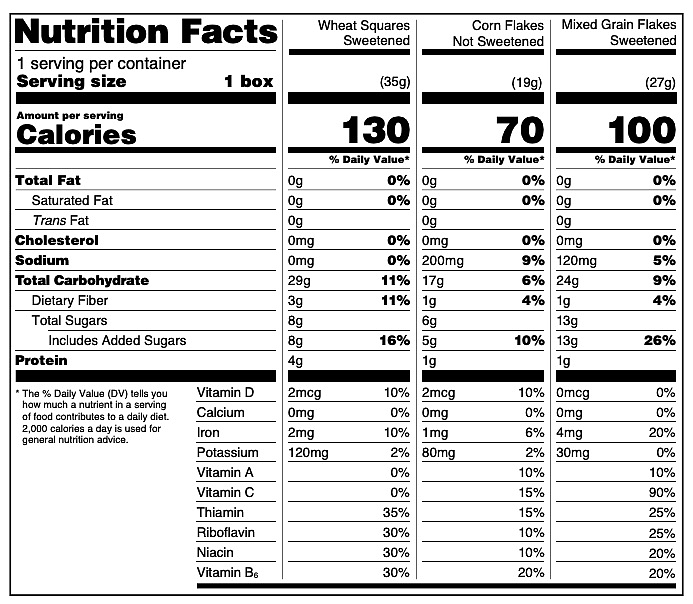

 

 

 

 

 

  

 

 

 

  

 

 

 

 

 

 

 

 

 

 

 

  

Nutrition Facts Wheat Squares Corn Flakes Mixed Grain Flakes
Sweetened Not Sweetened Sweetened
1 serving per container
Serving size 4 box (359) (199) (279)
De
Awourt persue
Calories 130 7
Total Fat 09 0% og
Saturated Fat 0g 0% og
Trans Fat 0g Og
Cholesterol Omg 0% Omg 0% Omg 0%
Sodium Omg 0% / 200mg 9% 120mg 5%
Total Carbohydrate 29g 11% 17g 6% 24g 9%
Dietary Fiber 3g 11% 1g 4% / 1g 4%
Total Sugars 8g 6g 13g
Includes Added Sugars 9 16% 5g 10% 139 26%
Protei 4g 1g 1g
ss
* The % Daily Value (DV) tells you it 2meg 10% 2meg 10% OMog 0%
tod cotbuas ta daly at omg 0% Omg 0% omg 0%
ieccieeamtie ang 10% img 6% ang0%
720mg 2% 80mg 2% 30mg 0%
0% 10% 10%
0% 15% 90%
35% 18% 25%
30% 10% 25%
30% 10% 20%
30% 20% 20%

 

 

 

 

 

 

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	693	604	-1	
2	1	1	0	0	0	9	13	675	2	-1	
3	1	1	1	0	0	9	13	675	2	-1	
4	1	1	1	1	0	9	13	675	2	-1	
5	1	1	1	

In [111]:
process_nutrition_label(Image.open("work/aggregated.jpg"))

***
### Dual Column Display, Per Serving and Per Container 


image dimensions 383*552


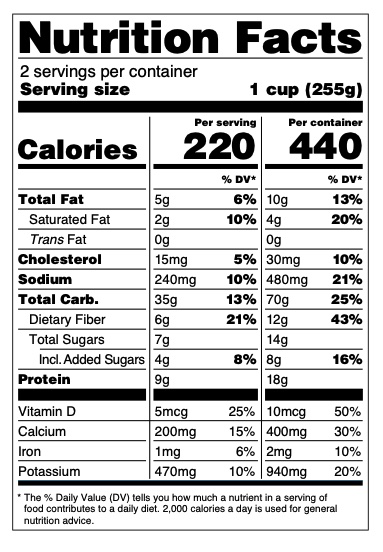

Processed image


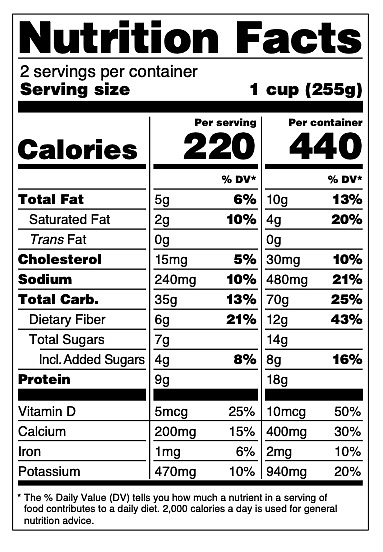

 

 

Nutrition Facts

2 servings per container
Serving size 1 cup (255g)

 

    
 
 
  
  
  
  
     
   
    
     

Porserving Per container

Calories

 

Total Fat 0g is
Saturated Fat 4g 20%
Trans Fat og,

Cholesterol 30mg 10%

Sodium 480mg 21%

Total Carb, 709 25%
Dietary Fiber 6 21% 129 43%

 

  

  

Total Sugars 79 14g

incl Added Sugars 4g 8% 8g 16%
99 189

SS

Smeg 25% 10meg 50%

    
 

 

200mg 15% / 400mg 30%
img 6%  2mg 10%
470mg 10% 940mg 20%

* The % Dally Value (OV) tll you how much a rutvint ina saving of
food contribute to a dally dle 2,000 calories a day is used for general
tition advice,

 
  

 

 

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	383	552	-1	
2	1	1	0	0	0	12	12	357	4	-1	
3	1	1	1	0	0	12	12	357	4	-1	
4	1	1	1	1	0	12	12	357	4	-1	
5	1	1	1	1	1	12	12	357	4	95	 
2	1	2	0	0	0	11	14	3	517	-1	
3	1	2	1	0	0	11	14	3	517	-1	
4	1	2	1	1	0	11	14	3	517	-1	
5	1	2	1	1	1	11	14	3	517	95	 
2	1	3	0	0	0	20	20	341	34	-1	
3

In [112]:
process_nutrition_label(Image.open("work/dualcolservingandcontainer.jpg"))

***
### Simplified Display 


image dimensions 400*573


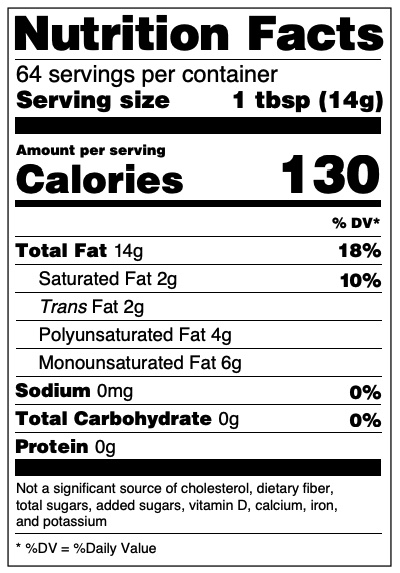

Processed image


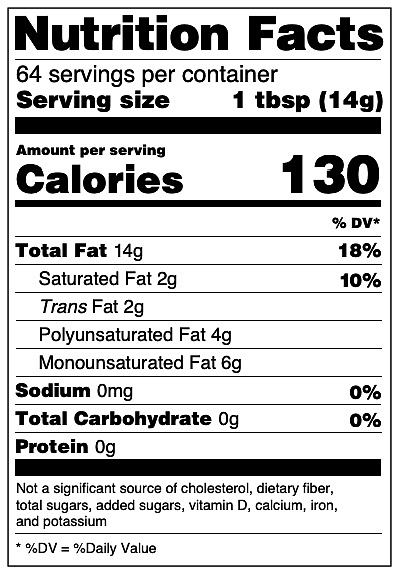

 

 

Nutrition Facts

64 servings per container
Serving size 1 tbsp (14g)
ee

Amount per serving

Calories 130

% DV*

Total Fat 14g 18%

Saturated Fat 2g 10%

Trans Fat 2g

Polyunsaturated Fat 4g

Monounsaturated Fat 6g
Sodium 0mg 0%
Total Carbohydrate 0g 0%

Protein 0g

Not a significant source of cholesterol, dietary fiber,
total sugars, added sugars, vitamin D, calcium, iron,
and potassium

* %DV  %Daily Value

 

 

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	400	573	-1	
2	1	1	0	0	0	7	7	385	2	-1	
3	1	1	1	0	0	7	7	385	2	-1	
4	1	1	1	1	0	7	7	385	2	-1	
5	1	1	1	1	1	7	7	385	2	95	 
2	1	2	0	0	0	7	7	2	560	-1	
3	1	2	1	0	0	7	7	2	560	-1	
4	1	2	1	1	0	7	7	2	560	-1	
5	1	2	1	1	1	7	7	2	560	95	 
2	1	3	0	0	0	15	15	368	36	-1	
3	1	3	1	0	0	15	15	368	36	-1	
4	1	3	1	1	0	15	15	368	36	-1	
5	1	3	1	1	1	15	15	213	36	96	Nutrition
5	1	3	1	1	2	249	16	134	35	96	Facts
2	1	4	0	0	0	15	65	368	69	-1	
3	1	4	1	0	0	15	65	368	69	-1	
4	1	4	1	1	0	17	65	261	22	-1	
5	1	4

In [113]:
process_nutrition_label(Image.open("work/simplified.jpg"))

***
### Tabular Dual Column Display 


image dimensions 967*231


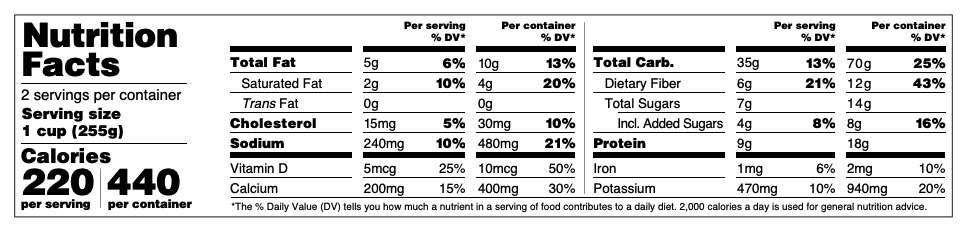

Processed image


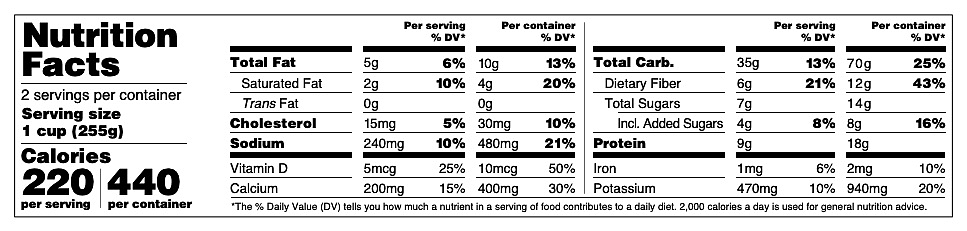

 

 

Nutrition
Facts

2 servings per container
Serving size

1 cup (255g)
Calories

220/440

 

 

 

 

 

 

Perserving Per container Per serving Per container
DV 3% DV % DV 3% DV
Total Fat 5g 6% 109 13% Total Carb, 359 13% 709 25%
SaturatedFat 2g 10% 4g 20% Dietary Fiber 69 21% 129 43%
Trans Fat og og Total Sugars 79 14g
Cholesterol img 5% 30mg 10% incl Added Sugars 4g 8% 8g 16%
Sodium 240mg 40% 480mg 21% Protein 99 189
Vitamin D Smog 25% 10meg 50% Iron img 6% 2mg 10%
Calcium 200mg 15% 400mg 30% Potassium 470mg 10% 940mg 20%

 

The % Daly Valu (DV) els you how much a ution in a serving of food contributes toa daly det 2,000 caries a day is used for general ution advice,

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	967	231	-1	
2	1	1	0	0	0	14	11	938	7	-1	
3	1	1	1	0	0	14	11	938	7	-1	
4	1	1	1	1	0	14	11	938	7	-1	
5	1	1	1	1	1	14	11	938	7	95	 
2	1	2	0	0	0	13	14	3	203	-1	
3	1	2	1	0	0	13	14	3	203	-1	
4	1	2	1	1	0	13	14	3	203	-1	
5	1	2	

In [114]:
process_nutrition_label(Image.open("work/tabulardualcol.jpg"))

***
### Dual lang


image dimensions 946*809


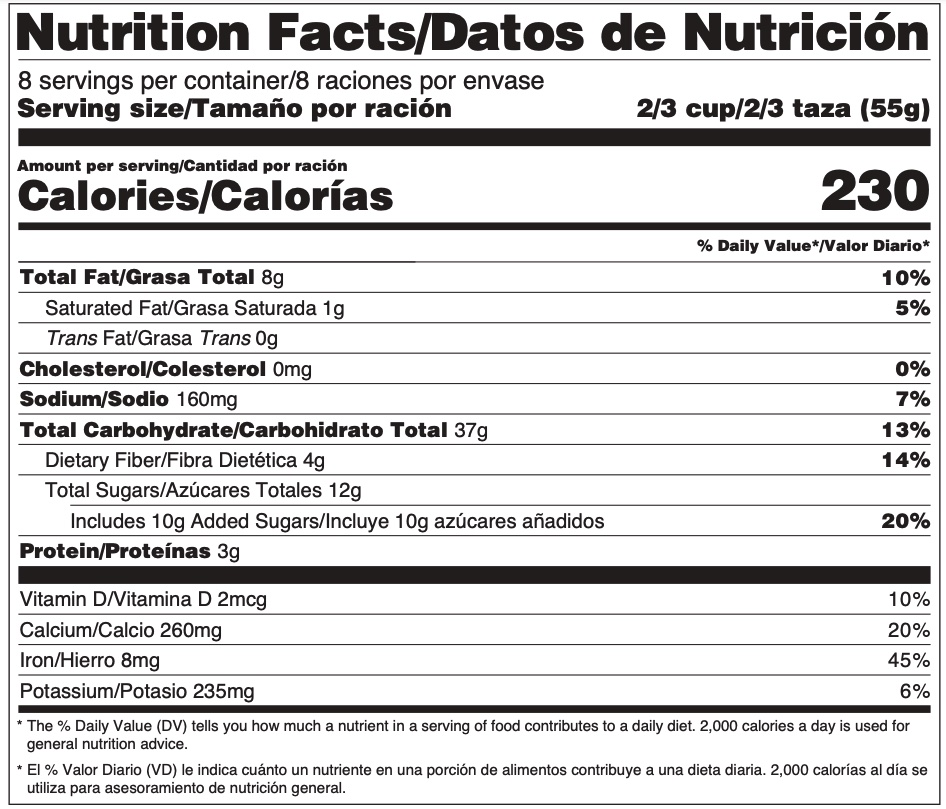

Processed image


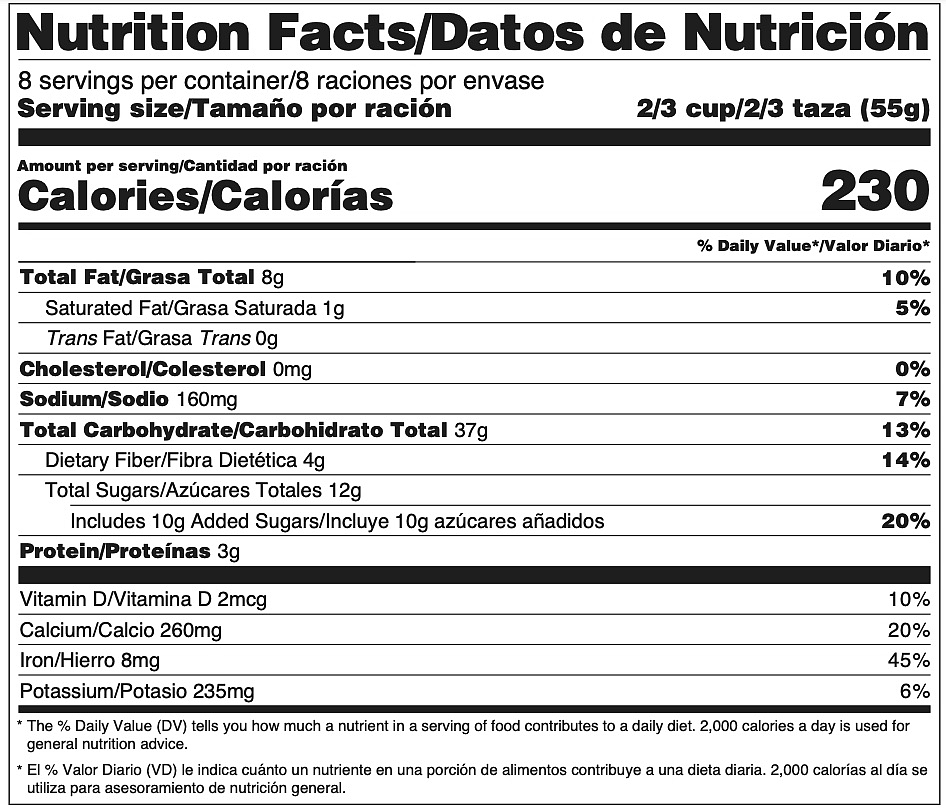

 

 

Nutrition Facts/Datos de Nutricion

8 servings per container/8 raciones por envase
Serving size/Tamafio por raci6n 2/3 cup/2/3 taza (55g)

 

 

  

Calories/Calorias 230

% Daily Value*/Valor Diario*

 

 

 

 

 

 

 

 

 

 

 

Total Fat/Grasa Total 8g 10%
Saturated Fat/Grasa Saturada 1g 5%
Trans Fat/Grasa Trans 0g

Cholesterol/Colesterol Omg 0%

Sodium/Sodio 160mg 7%

Total Carbohydrate/Carbohidrato Total 37g 13%
Dietary Fiber/Fibra Dietetica 4g 14%
Total Sugars/Azucares Totales 12g

Includes 10g Added Sugars/Incluye 10g azicares afiadidos 20%

 

Protein/Proteinas 3g

 

 

 

Vitamin D/Vitamina D 2mcg 10%
Calcium/Calcio 260mg 20%
lron/Hierro 8mg 45%
Potassium/Potasio 235mg 6%

* The % Daily Value (DV) tells you how much a nutrient in a serving of food contributes to a daily diet, 2,000 calories a day is used for
general nutrition advice,

* El % Valor Diario (VD) le indica cuanto un nutriente en una porcion de alimentos contribuye a una dieta diaria, 2,000 calorias al d

In [116]:
process_nutrition_label(Image.open("work/duallang.jpg"))